In [35]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ptb_data = pd.read_csv(Path("../data/framerate_test_fliptimes.csv"))
logger_data = pd.read_pickle(Path("../data/framerate_test.pkl"))

ptb_data = pd.DataFrame(np.diff(ptb_data.values.flatten()), columns=["flip_times"])
logger_data = pd.DataFrame(
    np.diff(logger_data["continuous"][1]["frame_flips"]), columns=["logger_times"]
)
alldata = ptb_data.join(logger_data)
meltdata = alldata.melt(value_name="times", var_name="source")
meltdata["freqs"] = 1 / meltdata["times"]
differences = alldata["logger_times"] - alldata["flip_times"]

(0.0, 0.015)

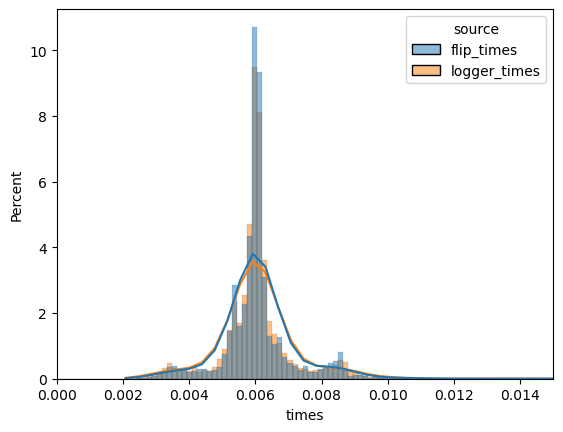

In [29]:
sns.histplot(
    meltdata, x="times", hue="source", stat="percent", bins=np.linspace(0.0, 0.015, 100), kde=True
)
plt.xlim(0, 0.015)

<Axes: xlabel='freqs', ylabel='Percent'>

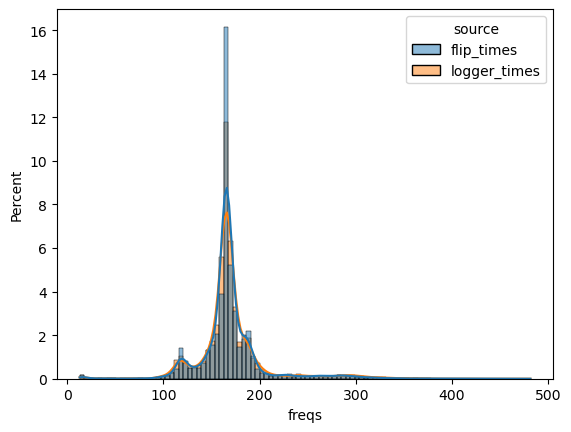

In [38]:
sns.histplot(meltdata, x="freqs", hue="source", stat="percent", bins=100, kde=True)

<Axes: ylabel='Count'>

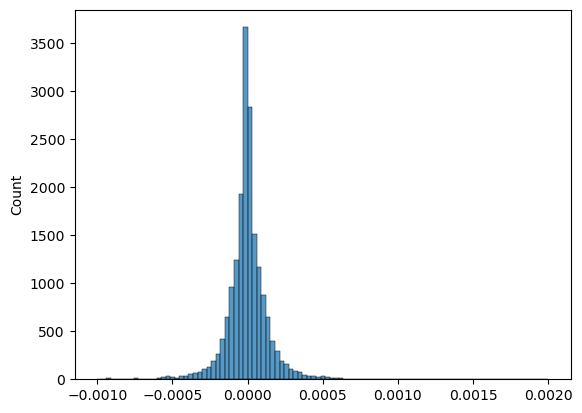

In [31]:
sns.histplot(differences, bins=np.linspace(-0.001, 0.002, 100))

In [33]:
differences.describe()

count    1.893900e+04
mean     1.181161e-08
std      3.214126e-03
min     -6.949800e-02
25%     -5.639999e-05
50%     -4.900008e-06
75%      5.380000e-05
max      7.081490e-02
dtype: float64

In [34]:
alldata.describe()

,flip_times,logger_times
count,18939.000000,18939.000000
mean,0.006336,0.006336
std,0.003845,0.004049
min,0.002440,0.002076
25%,0.005752,0.005718
50%,0.006041,0.006030
75%,0.006253,0.006286
max,0.074497,0.078594
